<a href="https://colab.research.google.com/github/joewebkid/deep_learning_summary/blob/main/additional_materials/linear_transformations_2d.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Two-Dimensional (2D) Linear Transformations 

A linear transformation of the plane $\mathbb{R}^2$ is a geometric transformation of the form
$$ 
  A\vec{x} = \vec{w}\ \ \  \Leftrightarrow \ \ \ 
  \left[ \begin{array}{cc}
                a & b\\ c & d
           \end{array} 
  \right]
   \left[ \begin{array}{c}
                x\\ y
           \end{array} 
  \right] = 
  \left[ \begin{array}{c}
                u\\ v
           \end{array} 
  \right] 
$$
where $a, b, c$ and $d$ are real numbers.

Linear transformations leave the origin fixed and preserve parallelism. As an example,
consider the matrix
$$
  A = \left[\begin{array}{cc}
          2 & -1 \\ 1 & 1
          \end{array}
      \right]
$$
that transforms an arbitrary vector $\left[ \begin{array}{c}
                x\\ y
           \end{array} \right]$
to a linear combination of the column vectors of $A$:
$$
  \left[ \begin{array}{c}
                u\\ v
           \end{array} 
  \right] =
  \left[\begin{array}{cc}
          2 & -1 \\ 1 & 1
          \end{array}
   \right]       
   \left[ \begin{array}{c}
                x \\ y
           \end{array} 
  \right] =
  x \left[ \begin{array}{c}
                2\\ 1
           \end{array} 
  \right] +
  y \left[ \begin{array}{c}
                -1\\ 1
           \end{array} 
  \right].
$$
We can get a visual feel for this transformation by looking at a regular grid of points before and after the transformation:

![](img/grid-original-small.png)  ![](img/grid-transformed-small.png)

This notebook describes how to use `Numpy` to perform and visualize special linear transformations, the
**scaling**, **shearing**, **rotation** and **reflexion** of a plane. 

In [ ]:
# Import necessary libraries:
%matplotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

import sys
sys.path.append('./Utilities/')

# Our helper, with the functions: 
# plot_vector, plot_linear_transformation, plot_linear_transformations
from plot_helper import *

Let's generate a matrix $A  = \left[ \begin{array}{cc}
              2 & -1 \\ 1 & 1
            \end{array}
      \right]
$  using `np.array()`. 

In [ ]:
A = [[2,-1], [1,1]]
A = np.array(A)
print(A)

[[ 2 -1]
 [ 1  1]]


We can use the NumPy [`dot()`](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.dot.html) method to multiply the matrix $A$ and the vector $\mathbf{x}$:

In [ ]:
x = np.array((2,1))

# Ax as a dot product
A.dot(x)
# or
A @ x

array([3, 3])

Sure enough, this gives the vector $\mathbf{b}$. Now let's see what happens when we multiply the matrix $A$ with the basis vectors $\mathbf{e_1}$ and $\mathbf{e_2}$:

In [ ]:
e1 = np.array((1,0))
e2 = np.array((0,1))
A.dot(e1)

array([2, 1])

In [ ]:
A.dot(e2)

array([-1,  1])

Let's try to visualize that. Our helpful custom function `plot_linear_transformation()` draws a grid of points on the plane, then applies the linear transformation described by the matrix argument, and plots the transformed grid. This is what $A$ does to the grid:

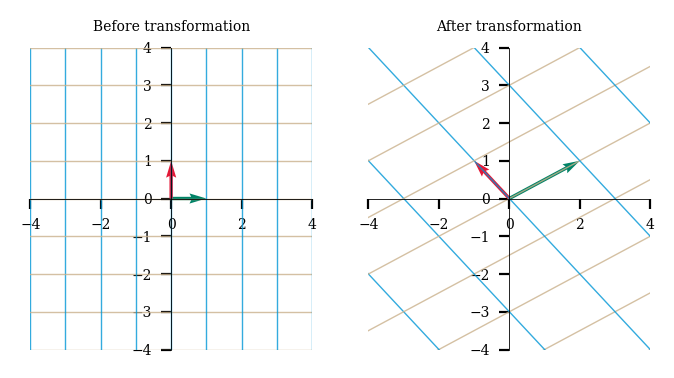

In [ ]:
plot_linear_transformation(A)

##### Key idea:

> A **linear transformation** keeps the origin in place and transforms straight lines to straight lines.

The third episode of the series [_"Essence of Linear Algebra"_](http://3b1b.co/eola) uses wonderful animations to illustrate the idea of matrices as linear transformations [3].

Let's practice with another example. Consider the matrix:

$$ M = \begin{bmatrix} 1 & 2 \\
                      2 & 1 \end{bmatrix} $$

The first column corresponds to the vector where $\mathbf{e_1}$ lands after the transformation, and the second column is where $\mathbf{e_2}$ lands:
$$
\mathbf{e_1} = \begin{bmatrix} 1 \\ 0 \end{bmatrix}  \Rightarrow  \begin{bmatrix} 1 \\ 2 \end{bmatrix} \\
\mathbf{e_2} = \begin{bmatrix} 0 \\ 1 \end{bmatrix}  \Rightarrow  \begin{bmatrix} 2 \\ 1 \end{bmatrix}
$$

Any arbitrary vector on the plane, $\mathbf{x} = \left[ \begin{array}{c} x \\ y  \end{array} \right]$, is transformed to: 

$$
  x \left[ \begin{array}{c} 1 \\ 2  \end{array} \right] + 
  y \left[ \begin{array}{c} 2 \\ 1  \end{array} \right]
$$

In [ ]:
M = [[1,2], [2,1]]
M = np.array(M)
print(M)

[[1 2]
 [2 1]]


In [ ]:
M.dot(e1)

array([1, 2])

In [ ]:
M.dot(e2)

array([2, 1])

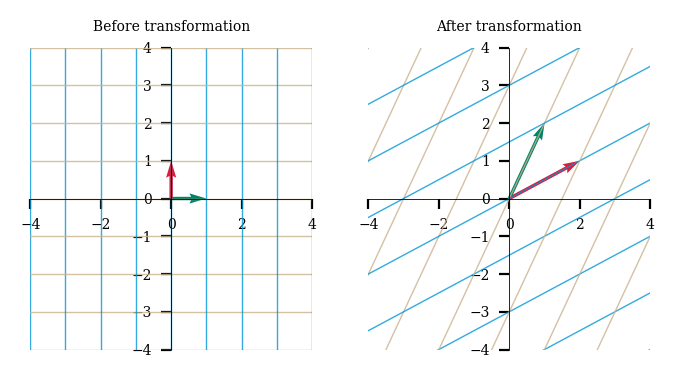

In [ ]:
plot_linear_transformation(M)

To see what the transformation does to one particular vector, we can use our custom function `plot_vector`, using the vector and its transformed self. Try several different ones…

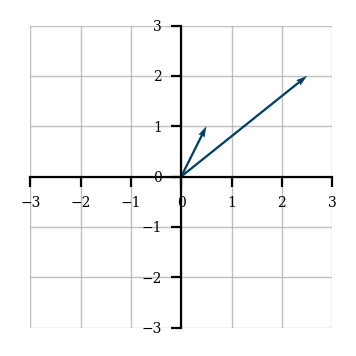

In [ ]:
x = np.array((0.5,1))

vectors = [x, M.dot(x)]
plot_vector(vectors)

##### Note:

When we represent a matrix in Python using the NumPy array data type, we define it by listing the **rows** of the matrix. We didn't emphasize this in the examples above, where we chose matrices whose rows matched the columns! But that's just a coincidence. Look at another case:

In [ ]:
N = np.array([[1,2],[-3,2]])
print(N)

[[ 1  2]
 [-3  2]]


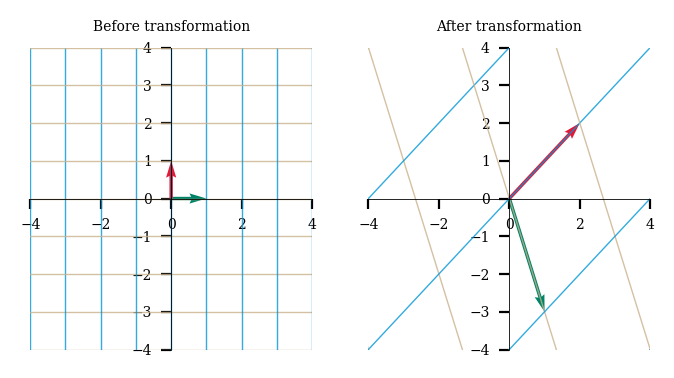

In [ ]:
plot_linear_transformation(N)

In [ ]:
# Rotation
theta = np.pi/3 # 60 degree clockwise rotation
B = [[np.cos(theta), np.sin(theta)], [-np.sin(theta), np.cos(theta)]]
B = np.array(B)
print(B)

[[ 0.5        0.8660254]
 [-0.8660254  0.5      ]]


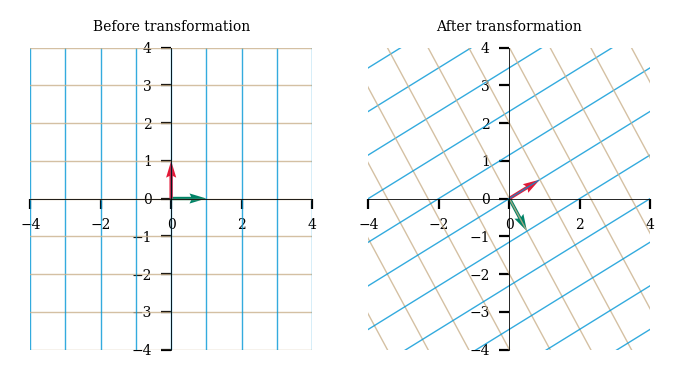

In [ ]:
plot_linear_transformation(B)

**Exercise 1.**

Create a $2\times2$ matrix of your choosing (as a NumPy array of the row list), print it, then multiply it by the basis vectors $\mathbf{e_1}$ and $\mathbf{e_2}$, and finally visualize it using our helper function `plot_linear_transformation()`.

## Matrix-vector multiplication

Consider again the matrix $A$ defined above. As a linear transformation, it transforms any arbitrary vector on the plane, $\mathbf{x} = \left[ \begin{array}{c} x \\ y  \end{array} \right]$ , to: 
$$
  x \left[ \begin{array}{c} -2 \\ 1  \end{array} \right] + 
  y \left[ \begin{array}{c} 1 \\ -3  \end{array} \right]
$$

Since applying the linear transformation *is* computing the matrix-vector multiplication $A\mathbf{x}$, we see that matrix-vector multiplication is a combination of the matrix columns scaled by the vector components:

$$
   A\mathbf{x} = x\,\mathbf{a} + y\,\mathbf{b}
$$
where the vectors $\mathbf{a}$ and $\mathbf{b}$ are the columns of $A$.

##### Key idea:

> The matrix-vector multiplication $A\mathbf{x}$ is a linear combination of the columns of $A$ scaled by the components of $\mathbf{x}$.

This is also the case in 3 dimensions. Consider the matrix $B$ and the vector $\mathbf{y}=\left[ \begin{array}{c} x \\ y \\z \end{array} \right]$

$$ B = \begin{bmatrix} 1 & 2 & 4\\
                       2 & 1 & -1\\
                       0 & 3 & 1 \end{bmatrix} $$

$$ B\mathbf{y} = x\left[ \begin{array}{c} 1 \\ 2 \\0 \end{array} \right] + 
                 y\left[ \begin{array}{c} 2 \\ 1 \\3 \end{array} \right] + 
                 z\left[ \begin{array}{c} 4 \\ -1 \\1 \end{array} \right] 
$$

## Some special transformations

### Rotation

Imagine that you want a transformation that takes any vector and rotates it 90 degrees to the left. You can visualize that the unit vectors need to be transformed as follows:

$$
\mathbf{e_1} = \begin{bmatrix} 1 \\ 0 \end{bmatrix}  \Rightarrow  \begin{bmatrix} 0 \\ 1 \end{bmatrix} \\
\mathbf{e_2} = \begin{bmatrix} 0 \\ 1 \end{bmatrix}  \Rightarrow  \begin{bmatrix} -1 \\ 0 \end{bmatrix}
$$

That means that the matrix that transforms all vectors by a left 90-degree **rotation** is:

$$ R = \begin{bmatrix} 0 & -1 \\
                       1 & 0 \end{bmatrix} $$

The rotation of any vector $\mathbf{x}$ is the multiplication $R\mathbf{x}$.

### Shear

Another special transformation turns every square into a diamond shape by leaving $\mathbf{x}$ unchanged, and transforming $\,\mathbf{j}$ so its tip falls on the coordinates $(1,1)$: 

$$
\mathbf{e_1} = \begin{bmatrix} 1 \\ 0 \end{bmatrix}  \Rightarrow  \begin{bmatrix} 1 \\ 0 \end{bmatrix} \\
\mathbf{e_2} = \begin{bmatrix} 0 \\ 1 \end{bmatrix}  \Rightarrow  \begin{bmatrix} 1 \\ 1 \end{bmatrix}
$$

This transformation is often called **shear**, and the matrix is:


$$ S = \begin{bmatrix} 1 & 1 \\
                       0 & 1 \end{bmatrix} $$

The shear of any vector $\mathbf{x}$ is the multiplication $S\mathbf{x}$.

Let's define these matrices as NumPy arrays, then use our helper function to visualize the corresponding transformation.

In [ ]:
rotation = np.array([[0,-1], [1,0]])
print(rotation)

[[ 0 -1]
 [ 1  0]]


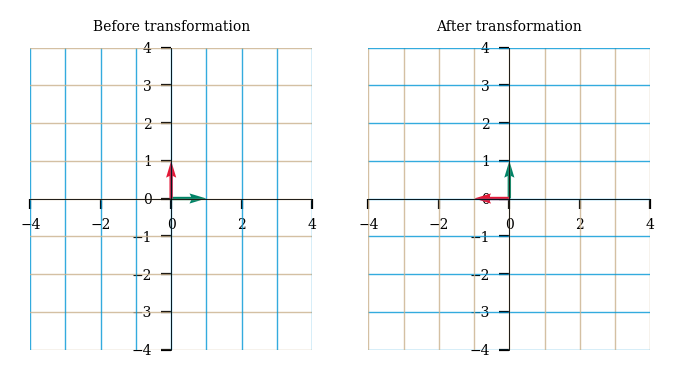

In [ ]:
plot_linear_transformation(rotation)

In [ ]:
shear = np.array([[1,1], [0,1]])
print(shear)

[[1 1]
 [0 1]]


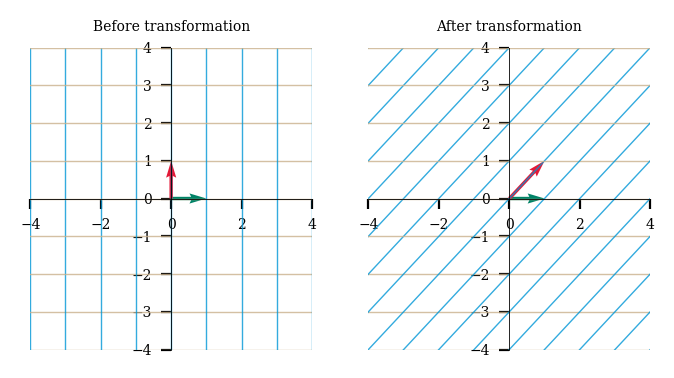

In [ ]:
plot_linear_transformation(shear)

### Scaling

A **scaling** transformation doesn't rotate or shear the basis vectors, but scales them in length. For example, a transformation that elongates $\mathbf{e_1}$ but shrinks $\mathbf{e_2}$ could do:


$$
\mathbf{e_1} = \begin{bmatrix} 1 \\ 0 \end{bmatrix}  \Rightarrow  \begin{bmatrix} 2 \\ 0 \end{bmatrix} \\
\mathbf{e_2} = \begin{bmatrix} 0 \\ 1 \end{bmatrix}  \Rightarrow  \begin{bmatrix} 0 \\ 0.5 \end{bmatrix}
$$

Look at what the matrix transformation does in this case…

[[2.  0. ]
 [0.  0.5]]


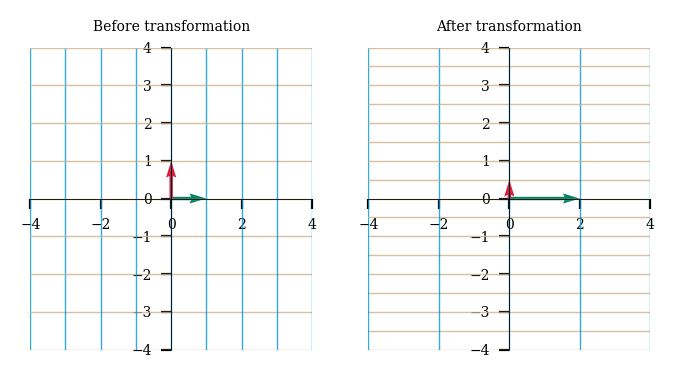

In [ ]:
scale = np.array([[2,0], [0,0.5]])
print(scale)
plot_linear_transformation(scale)

The common structure of scaling matrices is that they have non-zero values in the diagonal, but zero values elsewhere.
One special scaling matrix leaves the lengths of the basis vectors unchanged: it is called the **identity** matrix:


$$ I = \begin{bmatrix} 1 & 0 \\
                       0 & 1 \end{bmatrix} $$

NumPy creates identity arrays of any size with [`np.identity()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.eye.html?highlight=eye#numpy.eye), passing the dimension (number of rows and columns) as argument. In the 2D case:

In [ ]:
I = np.identity(2)
print(I)

[[1. 0.]
 [0. 1.]]


**Exercise 2**

Create a rotation matrix that rotates every vector 90 degrees clockwise, then visualize the transformation with our helper function.

**Exercise 3**

Construct a $2\times 2$ matrix $A_1$ that performs a horizontal shear transforming $\vec{e}_2$ into $\vec{e}_2+2\vec{e}_1$ (leaving $\vec{e}_1$ unchanged). Then, write a Python code to visualize the matrix transformation.

**Exercise 4**


Construct a $2\times 2$ matrix $A_2$ that performs and reflects vectors through the line $y=-x$. Then, write a Python code to visualize the transformation.

**Exercise 5**
Write a Python code to compute $A =A_1A_2$ and visualize the matrix transformation $A\vec{x}$, where $A_1$ and $A_2$ are the matrices obtained in Exercise 3 and 4.

## Matrix-matrix multiplication

What do you think happens when we apply two linear transformations? For example, if we rotate all vectors by 90 degrees to the left, and *then* apply a shear transformation?

Take any vector $\mathbf{x}$, rotate it by multiplying it with the matrix $R$, then take this transformed vector and multiply it by the matrix $S$. The final vector is the result of the two combined linear transformations. It is analogous to the composition of two functions, and its computation leads to a matrix-matrix multiplication:

$$
  S\, R\, \mathbf{x} =
   \begin{bmatrix} 1 & 1 \\
                       0 & 1 \end{bmatrix}
  \begin{bmatrix} 0 & -1 \\
                       1 & 0 \end{bmatrix}
  \mathbf{x}
$$

We can almost work this out in our heads. 
The unit vector $\mathbf{e_1}$ gets first rotated to $\begin{bmatrix} 0 \\ 1 \end{bmatrix}$ (the first column of $R$), and then is transformed by $S$ via the multiplication:

$$
  S\,\begin{bmatrix} 0 \\ 1 \end{bmatrix} =
    \begin{bmatrix} 1 & 1 \\
                    0 & 1 \end{bmatrix}
  \begin{bmatrix} 0 \\ 1 \end{bmatrix} =
  0 \begin{bmatrix} 1 \\ 0 \end{bmatrix}+
  1 \begin{bmatrix} 1 \\ 1 \end{bmatrix} =
    \begin{bmatrix} 1 \\ 1 \end{bmatrix}
$$

Similarly for the unit vector $\mathbf{e_2}$, we now find it lands on $\begin{bmatrix} -1 \\ 0 \end{bmatrix}$. We have the two columns of the resulting matrix from the multiplication $SR$.

Python has a built-in operator that computes matrix-matrix multiplication: `@`. Try it:

In [ ]:
print(shear@rotation)

[[ 1 -1]
 [ 1  0]]


Yep. Those are the two column vectors we worked out above. Beautiful. 
Let's visualize the combined transformation now.

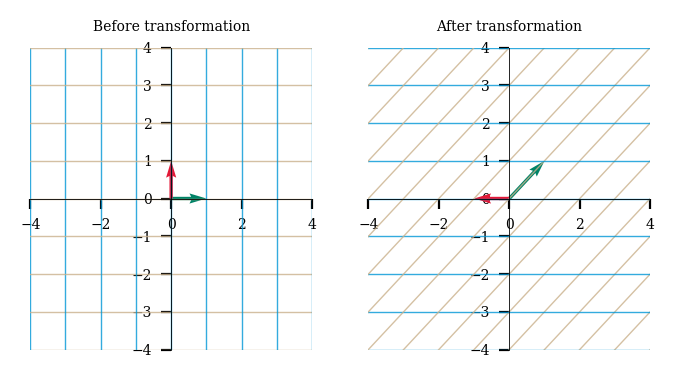

In [ ]:
plot_linear_transformation(shear@rotation)

##### Key idea:

> Matrix multiplication corresponds to composition of linear transformations, i.e., applying two transformations in sequence.

This view of matrix multiplication will save you from a lot of unnecessary memorization. It also illuminates the properties of matrix multiplications. For example, is it the same to apply shear and *then* rotate, instead of the other way around? 

This is the same question as asking if matrix multiplication is commutative. Is $SR$ the same as $RS$?

We have a helper function that plots the grid lines on a plane after two transformations in sequence. Let's try it with $S$ and $R$ in swapped orders.

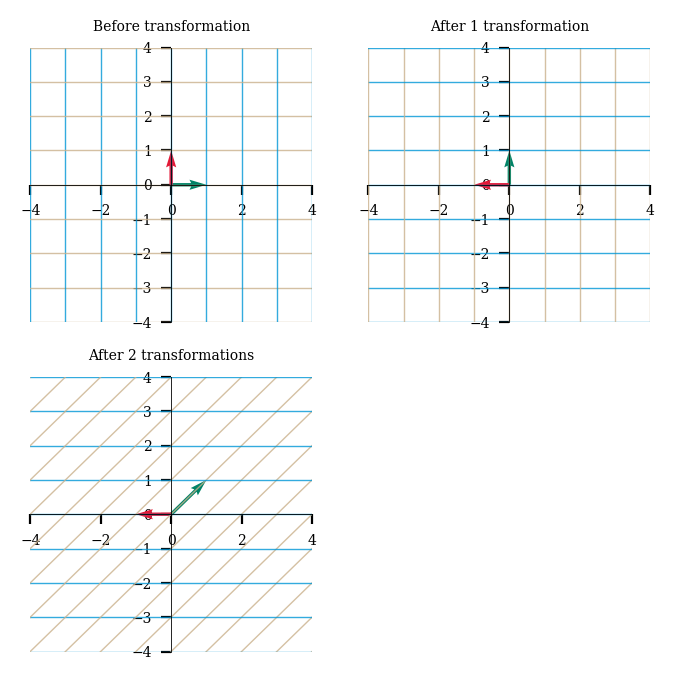

In [ ]:
# the order of transformation: from right to left
plot_linear_transformations(rotation, shear) 

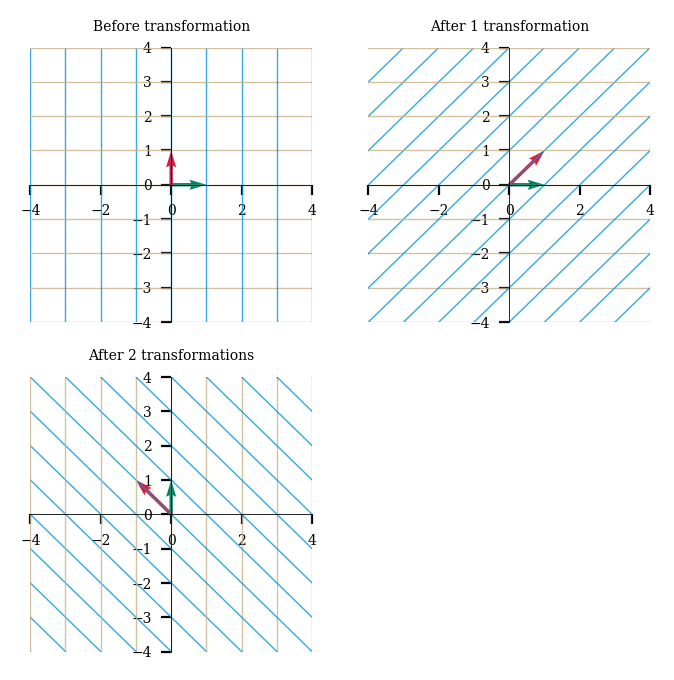

In [ ]:
plot_linear_transformations(shear, rotation) 

Nope. The result is not the same. The order of transformations matters and **matrix mulitiplication is not commutative** (in general).

Episode four of the series [_"Essence of Linear Algebra"_](http://3b1b.co/eola) beautifully illustrates the key idea of matrix multiplication as composition of linear transformations [4].

## Inverse of a matrix

Thinking of matrices as linear transformations also helps demistify the idea of an **inverse**. We won't go into details here, but imagine that you apply two transformations in sequence, and every vector in 2D space ends up just where it started. Well, that can happen when one transformation undoes the previous one. This means that the second transformation is the inverse of the first.

NumPy has great built-in Linear Algebra capabilities in the `numpy.linalg` module. Among its many functions, we get [`inv()`](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.linalg.inv.html), to compute the inverse of a matrix. So we can try right away to visualize a sequence of transformations: first with the matrix $M$, then the inverse of $M$. Check it out.

In [ ]:
from numpy.linalg import inv

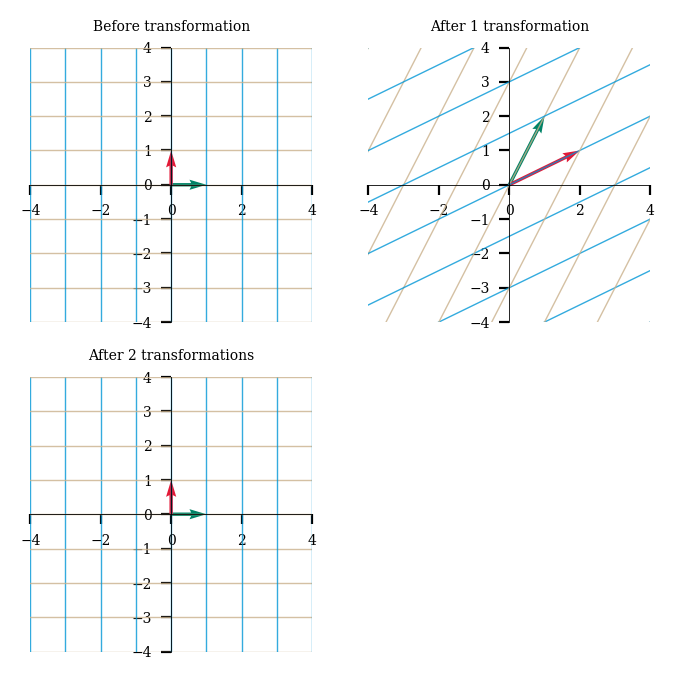

In [ ]:
M = np.array([[1,2], [2,1]])
M_inv = inv(M)
plot_linear_transformations(M, M_inv)

## Linear transformation on images ##

Here we will do basic liear transformations on images. There are many advanced python modules of manipulating images, and you may google to find out. One example is [here](https://automatetheboringstuff.com/chapter17/).

In [ ]:
# Import a image manipulating library 
#import imageio
import matplotlib.image as mpimg

### Images are Data ###

In [ ]:
# Load an image file.
RGB_Image = mpimg.imread("./img/lennon.png")

# To see basic features of the imported image.
print(type(RGB_Image), RGB_Image.dtype, RGB_Image.shape) 
print(' ' )
print(RGB_Image) # See the image as ndarray

<class 'numpy.ndarray'> float32 (766, 766, 4)
 
[[[0.8666667  0.90588236 0.8784314  1.        ]
  [0.87058824 0.9098039  0.88235295 1.        ]
  [0.8784314  0.91764706 0.8901961  1.        ]
  ...
  [0.3372549  0.23529412 0.22352941 1.        ]
  [0.33333334 0.23921569 0.22352941 1.        ]
  [0.34117648 0.24705882 0.23137255 1.        ]]

 [[0.8666667  0.90588236 0.8784314  1.        ]
  [0.87058824 0.9098039  0.88235295 1.        ]
  [0.87058824 0.9098039  0.88235295 1.        ]
  ...
  [0.34509805 0.24705882 0.23137255 1.        ]
  [0.34117648 0.24705882 0.23137255 1.        ]
  [0.34117648 0.24705882 0.23137255 1.        ]]

 [[0.8627451  0.9019608  0.87058824 1.        ]
  [0.8627451  0.9019608  0.87058824 1.        ]
  [0.85882354 0.8980392  0.87058824 1.        ]
  ...
  [0.34117648 0.24313726 0.22745098 1.        ]
  [0.3372549  0.24313726 0.22745098 1.        ]
  [0.3372549  0.24705882 0.23137255 1.        ]]

 ...

 [[0.6666667  0.6156863  0.5294118  1.        ]
  [0.65490

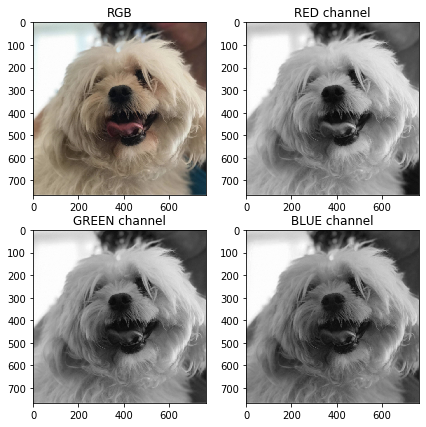

In [ ]:
x, y, channel = (RGB_Image.shape)          # X size, Y size, number of channel 
                                           # (3 for RGB image).

Red_Image = RGB_Image[:,:,0]               # Store Red channel in a Numpy array.
Green_Image = RGB_Image[:,:,1]             # Store Green channel in a Numpy array.
Blue_Image = RGB_Image[:,:,2]              # Store Blue channel in a Numpy array.

#-------------------------:
# Show images on screen   :
#-------------------------:
plt.figure(figsize = (7,7))
plt.subplot(2,2,1); plt.imshow(RGB_Image); plt.title('RGB')
plt.subplot(2,2,2); plt.imshow(Red_Image, cmap='gray'); plt.title('RED channel')
plt.subplot(2,2,3); plt.imshow(Green_Image, cmap='gray'); plt.title('GREEN channel')
plt.subplot(2,2,4); plt.imshow(Blue_Image, cmap='gray'); plt.title('BLUE channel')
plt.show()

### Linear transformation##

In [ ]:
# Define a linear transformation function
def linear_transformation(src, A):
    m, n = src.shape
    points = np.mgrid[0:n, 0:m].reshape((2, m*n))
    new_points = np.linalg.inv(A).dot(points).round().astype(int)
    x, y = new_points.reshape((2, m, n), order='F')
    indices = x + n*y
    return np.take(src, indices, mode='wrap')

In [ ]:
A = np.array([[1, 0], [0, 0.5]]) # Scaling
dst = linear_transformation(Red_Image, A)

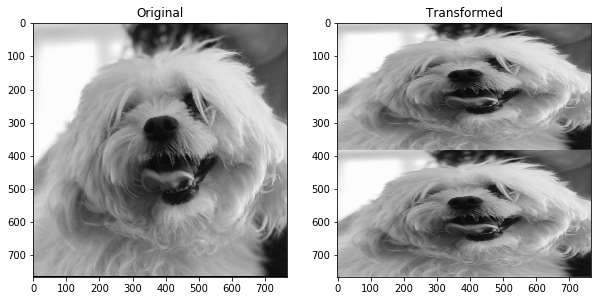

In [ ]:
plt.figure(figsize = (10,10))
plt.subplot(1,2,1); plt.imshow(Red_Image, cmap='gray'); plt.title('Original')
plt.subplot(1,2,2); plt.imshow(dst, cmap='gray'); plt.title('Transformed')
plt.show()

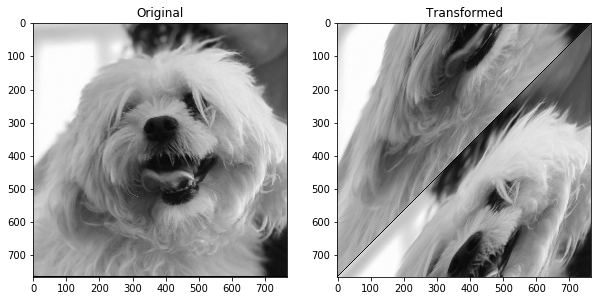

In [ ]:
B = np.array([[1, 0], [-1, 1]]) # Rotation
dst2 = linear_transformation(Red_Image, B)

plt.figure(figsize = (10,10))
plt.subplot(1,2,1); plt.imshow(Red_Image, cmap='gray'); plt.title('Original')
plt.subplot(1,2,2); plt.imshow(dst2, cmap='gray'); plt.title('Transformed')
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

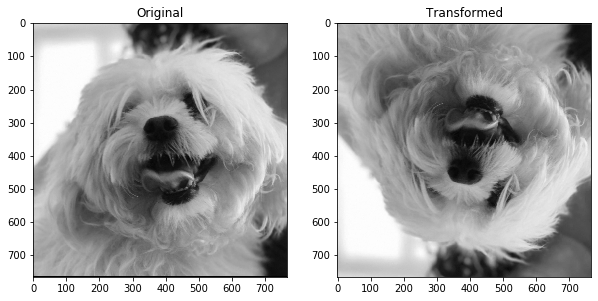

In [ ]:
C = np.array([[1, 0], [0, -1]]) # Reflection about x-axis
#C = np.array([[-1, 0], [0, 1]]) # Reflection about y-axis
#C = np.array([[0, 1], [1, 0]]) # Reflection about y-axis
dst3 = linear_transformation(Red_Image, C)
plt.figure(figsize = (10,10))
plt.subplot(1,2,1); plt.imshow(Red_Image, cmap='gray'); plt.title('Original')
plt.subplot(1,2,2); plt.imshow(dst3, cmap='gray'); plt.title('Transformed')
plt.show

**Main Sources** 
    1. https://notgnoshi.github.io/linear-transformations/
    2. https://dododas.github.io/linear-algebra-with-python/posts/16-12-29-2d-transformations.html
    
**References**   
[1] Vectors, what even are they? Essence of linear algebra, chapter 1. Video at https://youtu.be/fNk_zzaMoSs (2016), by Grant Sanderson.

[2] Linear combinations, span, and basis vectors. Essence of linear algebra, chapter 2. Video at https://youtu.be/k7RM-ot2NWY (2016), by Grant Sanderson.

[3] Linear transformations and matrices. Essence of linear algebra, chapter 3. Video at https://youtu.be/kYB8IZa5AuE (2016), by Grant Sanderson.
   
[4] Matrix multiplication as composition. Essence of linear algebra, chapter 4. Video at https://youtu.be/XkY2DOUCWMU (2016), by Grant Sanderson.
    
[5] https://mmas.github.io/linear-transformations-numpy   

[6] [Affine Image Transformations in Python with Numpy, Pillow and OpenCV](https://stackabuse.com/affine-image-transformations-in-python-with-numpy-pillow-and-opencv/)

**Further Reading**

* [Affine transform of an image](https://matplotlib.org/gallery/images_contours_and_fields/affine_image.html#sphx-glr-gallery-images-contours-and-fields-affine-image-py)